In [2]:
!pip install tppss

Defaulting to user installation because normal site-packages is not writeable


In [3]:
!pip install gdal

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install rioxarray

Defaulting to user installation because normal site-packages is not writeable


In [5]:
!pip install timeout_decorator

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from datetime import date
from tppss import horizon, sunrise_sunset, sunrise_sunset_year
from dateutil import tz as dutz
import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt
from osgeo import gdal
import rioxarray
import numpy as np
import xarray as xr
from tqdm import tqdm
# import concurrent.futures
from functools import partial
import time
from timeout_decorator import timeout, TimeoutError

In [3]:
file_path = "ETOPO_2022_v1_30s_N90W180_bed.tif"

In [4]:
KM = 1000

In [5]:
tz = dutz.gettz()

In [ ]:
'''
Process just one location
'''

In [19]:
def process_location(latlon, file_path):
    start_time = time.time()    
    try:
        with rasterio.open(file_path) as dataset:
            hor_izon = horizon(latlon, dataset, distance=1*KM, height=2, precision=2)
    except TimeoutError:
        return None

    sunsuns = sunrise_sunset_year(latlon, hor_izon, 2022, tz, 20)#60
    daylight_values = []
    for i in range(365):
        day, sunrise, sunset, allday = sunsuns[i]
        if allday:
            delta = 24
            print('Tpps says its all day')
        elif allday is None:
            delta = sunset - sunrise
            delta = delta.total_seconds() / 3600
            print('Calculating daylight hours')
        else:
            delta = 0
            print('Tpps says its all night')
        daylight_values.append(delta)
    end_time = time.time()  # Record the end time
    elapsed_time = end_time - start_time
    print(f"Execution time for location {latlon}: {elapsed_time} seconds")

    return daylight_values

In [20]:
latlon = (-22.58, -172.59)
daylight_hours_one = process_location(latlon, file_path)
daylight_hours_one

Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
Calculating daylight hours
C

[24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,
 24.0,

In [ ]:
'''
Open as xarray 
'''

In [10]:
da = rioxarray.open_rasterio(file_path, crs='EPSG:4326')

In [11]:
da

<xarray.DataArray (band: 1, y: 21600, x: 43200)>
[933120000 values with dtype=float32]
Coordinates:
  * band         (band) int64 1
  * x            (x) float64 -180.0 -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * y            (y) float64 90.0 89.99 89.98 89.97 ... -89.98 -89.99 -90.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:             Area
    node_offset:               1
    TIFFTAG_COPYRIGHT:         DOC/NOAA/NESDIS/NCEI > National Centers for En...
    TIFFTAG_DATETIME:          20220929123913
    TIFFTAG_IMAGEDESCRIPTION:  Topography-Bathymetry; EGM2008 height
    tos#node_offset:           1
    _FillValue:                -99999.0
    scale_factor:              1.0
    add_offset:                0.0
    units:                     metre

In [79]:
# Coordinates as shown in the DEM file
longitude_dem = da.x.values.astype(np.float32)
latitude_dem = da.y.values.astype(np.float32)

In [ ]:
'''
Add timeout, do not process all the lats/lons at once, store in zarr the partial results, run the rest
'''

In [6]:
def timeout_decorator(seconds, timeout_message="Timeout"):
    def decorator(func):
        def wrapper(*args, **kwargs):
            try:
                result = timeout(seconds)(func)(*args, **kwargs)
                return result
            except TimeoutError:
                print(timeout_message)
                return None

        return wrapper

    return decorator

@timeout_decorator(seconds=4, timeout_message="Timeout occurred in process_location")
def _process_location(latlon, file_path):
    start_time = time.time()    
    try:
        with rasterio.open(file_path) as dataset:
            hor_izon = horizon(latlon, dataset, distance=1*KM, height=0, precision=1)
    except TimeoutError:
        print(f"Timeout for location {latlon}: {time.time()-start_time} seconds")
        return None

    sunsuns = sunrise_sunset_year(latlon, hor_izon, 2022, tz, 20)
    sunsuns_array = np.array(sunsuns)
    daylight_values = []
    for i in range(365):
        day, sunrise, sunset, allday = sunsuns[i]
        if allday:
            delta = 24
        elif allday is None:
            delta = sunset - sunrise
            delta = delta.total_seconds() / 3600
        else:
            delta = 0
        daylight_values.append(delta)

    # daylight_values = np.where(sunsuns_array[:, 3] == True, 24, 
    #                        np.where(sunsuns_array[:, 3] is None, 
    #                                 0,
    #                                 ((sunsuns_array[:, 2] - sunsuns_array[:, 1]).astype('timedelta64[s]')).astype(float) / 3600)
    #                       )
    end_time = time.time()
    elapsed_time = end_time - start_time
    print(f"Execution time for location {latlon}: {elapsed_time} seconds")

    return daylight_values


In [153]:
'''
How long does it take to run a single coordinate
'''
with rasterio.open(file_path) as dataset:
    start_time = time.time()
    hor_izon = horizon((46.052361, 8.193722), dataset, distance=1*KM, height=0, precision=2)
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)
start_time = time.time()
sunsuns = sunrise_sunset_year((46.052361, 8.193722), hor_izon, 2022, tz, 20)
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time)

0.01619267463684082
2.1098456382751465


In [ ]:
'''
Coordinates of interest
'''

In [16]:
viganella_latlon = (46.052361, 8.193722)

In [20]:
viganella_daylight = _process_location(viganella_latlon, file_path)

Execution time for location (46.052361, 8.193722): 8.489435195922852 seconds


In [145]:
iceland_latlon = (65.259845, -14.008089)

In [146]:
iceland_daylight = _process_location(iceland_latlon, file_path)

Execution time for location (65.259845, -14.008089): 1.9741675853729248 seconds


In [7]:
nepal_latlon = (28.969749, 82.984592)

In [8]:
nepal_daylight = _process_location(nepal_latlon, file_path)

Execution time for location (28.969749, 82.984592): 1.8502192497253418 seconds


In [32]:
nepal_daylight = np.array(nepal_daylight)

In [43]:
for idx, d in enumerate(nepal_daylight):
    print(f'{idx}  --- {d}')

0  --- 10.18
1  --- 10.19
2  --- 10.2
3  --- 10.2
4  --- 10.21
5  --- 10.23
6  --- 10.24
7  --- 10.25
8  --- 10.26
9  --- 10.27
10  --- 10.28
11  --- 10.3
12  --- 10.31
13  --- 10.33
14  --- 10.35
15  --- 10.36
16  --- 10.38
17  --- 10.4
18  --- 10.41
19  --- 10.43
20  --- 10.45
21  --- 10.47
22  --- 10.49
23  --- 10.51
24  --- 10.53
25  --- 10.55
26  --- 10.57
27  --- 10.59
28  --- 10.62
29  --- 10.64
30  --- 10.66
31  --- 10.69
32  --- 10.71
33  --- 10.74
34  --- 10.76
35  --- 10.78
36  --- 10.81
37  --- 10.83
38  --- 10.85
39  --- 10.88
40  --- 10.91
41  --- 10.93
42  --- 10.96
43  --- 10.98
44  --- 11.01
45  --- 11.03
46  --- 11.07
47  --- 11.09
48  --- 11.12
49  --- 11.14
50  --- 11.18
51  --- 11.2
52  --- 11.23
53  --- 11.25
54  --- 11.28
55  --- 11.31
56  --- 11.34
57  --- 11.37
58  --- 11.4
59  --- 11.43
60  --- 11.45
61  --- 11.48
62  --- 11.51
63  --- 11.54
64  --- 11.56
65  --- 11.59
66  --- 11.63
67  --- 11.66
68  --- 11.69
69  --- 11.72
70  --- 11.75
71  --- 11.78
72  --- 

In [45]:
nepal_daylight[110:224][nepal_daylight[110:224] < 24] #Apr19-Ago11

array([23.99])

In [22]:
ran_latlon = (46, 6)

In [23]:
ran_daylight = _process_location(ran_latlon, file_path)

Execution time for location (46, 6): 8.63064455986023 seconds


Text(0.5, 1.0, 'Daylight hours in , considering topology')

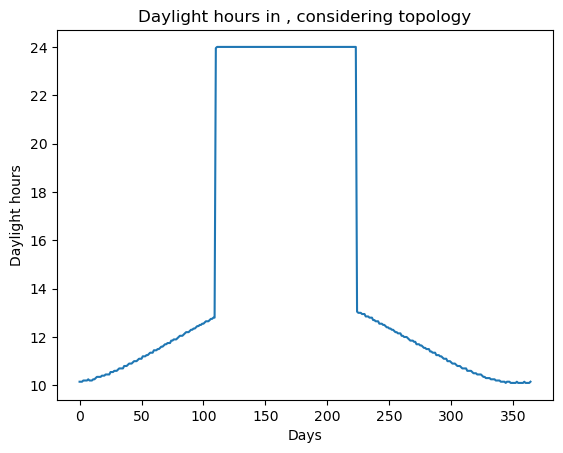

In [9]:
plt.plot(range(365), nepal_daylight)
plt.xlabel('Days')
plt.ylabel('Daylight hours')
plt.title('Daylight hours in , considering topology')

In [ ]:
'''
How does execution time change with precision
'''

Text(0, 0.5, 'Elapsed time')

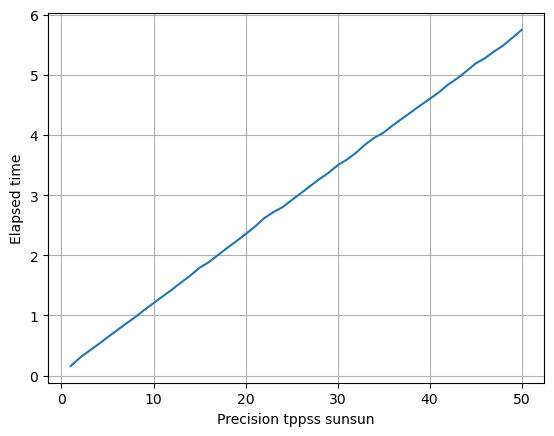

In [14]:
with rasterio.open(file_path) as dataset:
    hor_izon = horizon((46.052361, 8.193722), dataset, distance=1*KM, height=0, precision=2)

pres = np.arange(1, 51, 1)
elapsed_time = np.zeros(len(pres))
for idx, p in enumerate(pres):
    start_time = time.time()
    sunsuns = sunrise_sunset_year((46.052361, 8.193722), hor_izon, 2022, tz, p)
    end_time = time.time()
    elapsed_time[idx] = end_time - start_time
plt.plot(pres, elapsed_time)
plt.grid(True)
plt.xlabel('Precision tppss sunsun')
plt.ylabel('Elapsed time')

In [ ]:
'''
Run multiple latlons
'''

In [44]:
# Define a checkpoint file path
# checkpoint_file = 'checkpoint.npy'

latitude = latitude_dem[:10]
longitude = longitude_dem[:]
# longitude = [6, 6, 6]
# latitude = [46,46,-89.99]
daylight = np.zeros((365, len(latitude), len(longitude)))
for lat_idx, lat in tqdm(enumerate(latitude)):
    for lon_idx, lon in tqdm(enumerate(longitude)):
        latlon = (lat, lon)
        result = _process_location(latlon, file_path)
        if result is not None:
            daylight[:, lat_idx, lon_idx] = result
        else: 
            daylight[:, lat_idx, lon_idx] = np.nan
        if lon_idx % 50 == 0:
            # Save the array periodically during computation
            # np.save(checkpoint_file, daylight)

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:05,  5.20s/it]

Execution time for location (89.91250000000001, -179.9125): 5.197724103927612 seconds



2it [00:10,  5.19s/it]
1it [00:10, 10.38s/it]
0it [00:00, ?it/s]

Execution time for location (89.91250000000001, -179.90416666666667): 5.179153919219971 seconds



1it [00:05,  5.19s/it]

Execution time for location (89.90416666666667, -179.9125): 5.187174558639526 seconds



2it [00:10,  5.18s/it]
2it [00:20, 10.38s/it]

Execution time for location (89.90416666666667, -179.90416666666667): 5.17703652381897 seconds


In [ ]:
'''
Run random latlons and save plots
'''

In [11]:
# Set the seed for reproducibility (optional)
np.random.seed(42)

latitude = np.random.uniform(low=-90, high=90, size=10)
longitude = np.random.uniform(low=-180, high=180, size=10)

output_folder = 'daylight_random_plots'
import os
os.makedirs(output_folder, exist_ok=True)

In [13]:
for lat_idx, lat in tqdm(enumerate(latitude)):
    for lon_idx, lon in tqdm(enumerate(longitude)):
        latlon = (lat, lon)
        result = _process_location(latlon, file_path)
        plt.plot(range(365), result)
        plt.xlabel('Days')
        plt.ylabel('Daylight hours')
        latlon = (round(lat, 2), round(lon, 2))
        plt.title(f'Daylight hours in {latlon}, considering topology')
        # plt.ylim(np.array(result).min(), 24) 
        plt.grid(True)
        
        filename = f"plot_{lat_idx}_{lon_idx}.png"
        filepath = os.path.join(output_folder, filename)
        plt.savefig(filepath)
        
        # Clear the current figure for the next iteration
        plt.clf()

0it [00:00, ?it/s]
0it [00:00, ?it/s]
1it [00:01,  1.92s/it]

Execution time for location (-22.58277860747475, -172.58958205351112): 1.7948293685913086 seconds



2it [00:03,  1.92s/it]

Execution time for location (-22.58277860747475, 169.16754677831796): 1.774048089981079 seconds



3it [00:05,  1.92s/it]

Execution time for location (-22.58277860747475, 119.67935068815183): 1.8016941547393799 seconds



4it [00:07,  1.91s/it]

Execution time for location (-22.58277860747475, -103.55792015582058): 1.770899772644043 seconds



5it [00:09,  1.91s/it]

Execution time for location (-22.58277860747475, -114.54301180544378): 1.784820556640625 seconds



6it [00:11,  1.91s/it]

Execution time for location (-22.58277860747475, -113.97437645276382): 1.7666561603546143 seconds



7it [00:13,  1.91s/it]

Execution time for location (-22.58277860747475, -70.47279253456642): 1.7702887058258057 seconds



8it [00:15,  1.91s/it]

Execution time for location (-22.58277860747475, 8.912315387605616): 1.785815715789795 seconds



9it [00:17,  1.91s/it]

Execution time for location (-22.58277860747475, -24.499793288838333): 1.7827446460723877 seconds



10it [00:19,  1.91s/it]
1it [00:19, 19.12s/it]
0it [00:00, ?it/s]

Execution time for location (-22.58277860747475, -75.1575095287049): 1.795764684677124 seconds
Execution time for location (81.12857515378491, -172.58958205351112): 1.778824806213379 seconds



1it [00:01,  2.00s/it]
2it [00:03,  1.98s/it]

Execution time for location (81.12857515378491, 169.16754677831796): 1.7968575954437256 seconds



3it [00:05,  1.96s/it]

Execution time for location (81.12857515378491, 119.67935068815183): 1.7916240692138672 seconds



4it [00:07,  1.95s/it]

Execution time for location (81.12857515378491, -103.55792015582058): 1.7840123176574707 seconds



5it [00:09,  1.94s/it]

Execution time for location (81.12857515378491, -114.54301180544378): 1.7942619323730469 seconds



6it [00:11,  1.93s/it]

Execution time for location (81.12857515378491, -113.97437645276382): 1.7739429473876953 seconds



7it [00:13,  1.92s/it]

Execution time for location (81.12857515378491, -70.47279253456642): 1.7834980487823486 seconds



8it [00:15,  1.92s/it]

Execution time for location (81.12857515378491, 8.912315387605616): 1.7688686847686768 seconds



9it [00:17,  1.92s/it]

Execution time for location (81.12857515378491, -24.499793288838333): 1.7833645343780518 seconds



10it [00:19,  1.92s/it]
2it [00:38, 19.16s/it]
0it [00:00, ?it/s]

Execution time for location (81.12857515378491, -75.1575095287049): 1.7854466438293457 seconds



1it [00:01,  1.90s/it]

Execution time for location (41.75890952605292, -172.58958205351112): 1.7761526107788086 seconds



2it [00:03,  1.90s/it]

Execution time for location (41.75890952605292, 169.16754677831796): 1.7722578048706055 seconds



3it [00:05,  1.91s/it]

Execution time for location (41.75890952605292, 119.67935068815183): 1.7928855419158936 seconds



4it [00:07,  1.91s/it]

Execution time for location (41.75890952605292, -103.55792015582058): 1.7720861434936523 seconds



5it [00:09,  1.92s/it]

Execution time for location (41.75890952605292, -114.54301180544378): 1.7923481464385986 seconds



6it [00:11,  1.91s/it]

Execution time for location (41.75890952605292, -113.97437645276382): 1.7698347568511963 seconds



7it [00:13,  1.92s/it]

Execution time for location (41.75890952605292, -70.47279253456642): 1.7822015285491943 seconds



8it [00:15,  1.91s/it]

Execution time for location (41.75890952605292, 8.912315387605616): 1.7768328189849854 seconds



9it [00:17,  1.92s/it]

Execution time for location (41.75890952605292, -24.499793288838333): 1.7898881435394287 seconds



10it [00:19,  1.92s/it]
3it [00:57, 19.16s/it]
0it [00:00, ?it/s]

Execution time for location (41.75890952605292, -75.1575095287049): 1.7774648666381836 seconds



1it [00:01,  1.90s/it]

Execution time for location (17.758527155466595, -172.58958205351112): 1.775317907333374 seconds



2it [00:03,  1.90s/it]

Execution time for location (17.758527155466595, 169.16754677831796): 1.7718496322631836 seconds



3it [00:05,  1.90s/it]

Execution time for location (17.758527155466595, 119.67935068815183): 1.7797026634216309 seconds



4it [00:07,  1.91s/it]

Execution time for location (17.758527155466595, -103.55792015582058): 1.7979106903076172 seconds



5it [00:09,  1.91s/it]

Execution time for location (17.758527155466595, -114.54301180544378): 1.7972218990325928 seconds



6it [00:11,  1.91s/it]

Execution time for location (17.758527155466595, -113.97437645276382): 1.7836918830871582 seconds



7it [00:13,  1.91s/it]

Execution time for location (17.758527155466595, -70.47279253456642): 1.7790346145629883 seconds



8it [00:15,  1.91s/it]

Execution time for location (17.758527155466595, 8.912315387605616): 1.7763745784759521 seconds



9it [00:17,  1.91s/it]

Execution time for location (17.758527155466595, -24.499793288838333): 1.7852907180786133 seconds



10it [00:19,  1.91s/it]
4it [01:16, 19.14s/it]
0it [00:00, ?it/s]

Execution time for location (17.758527155466595, -75.1575095287049): 1.7771706581115723 seconds



1it [00:01,  1.89s/it]

Execution time for location (-61.916644720361425, -172.58958205351112): 1.7754895687103271 seconds



2it [00:03,  1.90s/it]

Execution time for location (-61.916644720361425, 169.16754677831796): 1.7817180156707764 seconds



3it [00:05,  1.90s/it]

Execution time for location (-61.916644720361425, 119.67935068815183): 1.772747278213501 seconds



4it [00:07,  1.90s/it]

Execution time for location (-61.916644720361425, -103.55792015582058): 1.7762484550476074 seconds



5it [00:09,  1.91s/it]

Execution time for location (-61.916644720361425, -114.54301180544378): 1.7708187103271484 seconds
Execution time for location (-61.916644720361425, -113.97437645276382): 1.7916288375854492 seconds



6it [00:11,  1.94s/it]
7it [00:13,  1.94s/it]

Execution time for location (-61.916644720361425, -70.47279253456642): 1.7848656177520752 seconds



8it [00:15,  1.94s/it]

Execution time for location (-61.916644720361425, 8.912315387605616): 1.7964980602264404 seconds



9it [00:17,  1.93s/it]

Execution time for location (-61.916644720361425, -24.499793288838333): 1.7733700275421143 seconds



10it [00:19,  1.93s/it]
5it [01:35, 19.17s/it]
0it [00:00, ?it/s]

Execution time for location (-61.916644720361425, -75.1575095287049): 1.767989158630371 seconds



1it [00:01,  1.89s/it]

Execution time for location (-61.92098633948352, -172.58958205351112): 1.7695505619049072 seconds



2it [00:03,  1.90s/it]

Execution time for location (-61.92098633948352, 169.16754677831796): 1.7850289344787598 seconds



3it [00:05,  1.90s/it]

Execution time for location (-61.92098633948352, 119.67935068815183): 1.7846972942352295 seconds



4it [00:07,  1.91s/it]

Execution time for location (-61.92098633948352, -103.55792015582058): 1.7806997299194336 seconds



5it [00:09,  1.92s/it]

Execution time for location (-61.92098633948352, -114.54301180544378): 1.7975339889526367 seconds



6it [00:11,  1.92s/it]

Execution time for location (-61.92098633948352, -113.97437645276382): 1.7797513008117676 seconds



7it [00:13,  1.92s/it]

Execution time for location (-61.92098633948352, -70.47279253456642): 1.7760109901428223 seconds



8it [00:15,  1.92s/it]

Execution time for location (-61.92098633948352, 8.912315387605616): 1.7853262424468994 seconds



9it [00:17,  1.92s/it]

Execution time for location (-61.92098633948352, -24.499793288838333): 1.7744982242584229 seconds



10it [00:19,  1.92s/it]
6it [01:55, 19.17s/it]
0it [00:00, ?it/s]

Execution time for location (-61.92098633948352, -75.1575095287049): 1.7798659801483154 seconds



1it [00:01,  1.92s/it]

Execution time for location (-79.5449498097241, -172.58958205351112): 1.7887966632843018 seconds



2it [00:03,  1.92s/it]

Execution time for location (-79.5449498097241, 169.16754677831796): 1.7825541496276855 seconds



3it [00:05,  1.92s/it]

Execution time for location (-79.5449498097241, 119.67935068815183): 1.7863247394561768 seconds



4it [00:07,  1.92s/it]

Execution time for location (-79.5449498097241, -103.55792015582058): 1.7871179580688477 seconds



5it [00:09,  1.92s/it]

Execution time for location (-79.5449498097241, -114.54301180544378): 1.785370111465454 seconds



6it [00:11,  1.91s/it]

Execution time for location (-79.5449498097241, -113.97437645276382): 1.778663158416748 seconds



7it [00:13,  1.91s/it]

Execution time for location (-79.5449498097241, -70.47279253456642): 1.7697782516479492 seconds



8it [00:15,  1.91s/it]

Execution time for location (-79.5449498097241, 8.912315387605616): 1.7646589279174805 seconds



9it [00:17,  1.91s/it]

Execution time for location (-79.5449498097241, -24.499793288838333): 1.7780935764312744 seconds



10it [00:19,  1.91s/it]
7it [02:14, 19.15s/it]
0it [00:00, ?it/s]

Execution time for location (-79.5449498097241, -75.1575095287049): 1.7786998748779297 seconds



1it [00:01,  1.91s/it]

Execution time for location (65.91170623948832, -172.58958205351112): 1.7906031608581543 seconds



2it [00:03,  1.91s/it]

Execution time for location (65.91170623948832, 169.16754677831796): 1.7809240818023682 seconds



3it [00:05,  1.92s/it]

Execution time for location (65.91170623948832, 119.67935068815183): 1.794539213180542 seconds



4it [00:07,  1.91s/it]

Execution time for location (65.91170623948832, -103.55792015582058): 1.7731258869171143 seconds



5it [00:09,  1.91s/it]

Execution time for location (65.91170623948832, -114.54301180544378): 1.7749934196472168 seconds



6it [00:11,  1.91s/it]

Execution time for location (65.91170623948832, -113.97437645276382): 1.7721762657165527 seconds



7it [00:13,  1.91s/it]

Execution time for location (65.91170623948832, -70.47279253456642): 1.7761859893798828 seconds



8it [00:15,  1.91s/it]

Execution time for location (65.91170623948832, 8.912315387605616): 1.7833278179168701 seconds



9it [00:17,  1.91s/it]

Execution time for location (65.91170623948832, -24.499793288838333): 1.7876214981079102 seconds



10it [00:19,  1.91s/it]
8it [02:33, 19.14s/it]
0it [00:00, ?it/s]

Execution time for location (65.91170623948832, -75.1575095287049): 1.789804220199585 seconds
Execution time for location (18.20070211377758, -172.58958205351112): 1.772779941558838 seconds



1it [00:01,  1.99s/it]
2it [00:03,  1.97s/it]

Execution time for location (18.20070211377758, 169.16754677831796): 1.779700756072998 seconds



3it [00:05,  1.95s/it]

Execution time for location (18.20070211377758, 119.67935068815183): 1.7822909355163574 seconds



4it [00:07,  1.94s/it]

Execution time for location (18.20070211377758, -103.55792015582058): 1.7953801155090332 seconds



5it [00:09,  1.93s/it]

Execution time for location (18.20070211377758, -114.54301180544378): 1.7800071239471436 seconds



6it [00:11,  1.93s/it]

Execution time for location (18.20070211377758, -113.97437645276382): 1.7953245639801025 seconds



7it [00:13,  1.92s/it]

Execution time for location (18.20070211377758, -70.47279253456642): 1.7826390266418457 seconds



8it [00:15,  1.92s/it]

Execution time for location (18.20070211377758, 8.912315387605616): 1.7737410068511963 seconds



9it [00:17,  1.92s/it]

Execution time for location (18.20070211377758, -24.499793288838333): 1.7933175563812256 seconds



10it [00:19,  1.92s/it]
9it [02:52, 19.16s/it]
0it [00:00, ?it/s]

Execution time for location (18.20070211377758, -75.1575095287049): 1.7855796813964844 seconds



1it [00:01,  1.93s/it]

Execution time for location (37.45306400328819, -172.58958205351112): 1.8000473976135254 seconds



2it [00:03,  1.92s/it]

Execution time for location (37.45306400328819, 169.16754677831796): 1.7891972064971924 seconds



3it [00:05,  1.92s/it]

Execution time for location (37.45306400328819, 119.67935068815183): 1.7815022468566895 seconds



4it [00:07,  1.92s/it]

Execution time for location (37.45306400328819, -103.55792015582058): 1.783552646636963 seconds



5it [00:09,  1.91s/it]

Execution time for location (37.45306400328819, -114.54301180544378): 1.780029058456421 seconds



6it [00:11,  1.91s/it]

Execution time for location (37.45306400328819, -113.97437645276382): 1.7860119342803955 seconds



7it [00:13,  1.92s/it]

Execution time for location (37.45306400328819, -70.47279253456642): 1.799182415008545 seconds



8it [00:15,  1.91s/it]

Execution time for location (37.45306400328819, 8.912315387605616): 1.7730231285095215 seconds



9it [00:17,  1.91s/it]

Execution time for location (37.45306400328819, -24.499793288838333): 1.7676193714141846 seconds



10it [00:19,  1.91s/it]
10it [03:11, 19.16s/it]

Execution time for location (37.45306400328819, -75.1575095287049): 1.787423849105835 seconds


<Figure size 640x480 with 0 Axes>

In [ ]:
'''
Make zarrs
How many coordinates should i run at once?
PAUSED
'''

In [ ]:
import boto3
import s3fs
import dask.array as da
from botocore.exceptions import NoCredentialsError
from config import S3_BUCKET#, MODELS_PATH

In [ ]:
def create_sample_dset(lat_vals, lon_vals):
    """
    creates the foundations of a dataset to then be filled by region
    """
    
    # Set up dimensions and coordinate values
    #
    
    time_vals = np.array(range(365))

    # Define shape and chunks
    var_shape = (len(time_vals), len(lat_vals), len(lon_vals))
    
    # Create empty data_var
    #
    var_data = xr.DataArray(da.full(var_shape, np.nan, dtype=np.float32),
                        coords=[time_vals, lat_vals, lon_vals], 
                        dims=['day', 'lat', 'lon'],
                        name=var)

    # Create dset
    #
    ds = xr.Dataset({var: var_data},
                    coords={
                        'lat': lat_vals,
                        'lon': lon_vals,
                        'time': time_vals
                    })
    return ds


def file_exists(bucket_name, object_key):
    try:
        s3.Object(bucket_name, object_key + '/.zmetadata').load()
    except NoCredentialsError:
        # If credentials are not available, handle it
        print("Credentials not available")
        return False
    except Exception as e:
        return False
    return True

In [ ]:
## Declare vars
#
var = 'ssrd'
scenario = 'historical'

s3_path_target = f's3://climate-ai-data-science-datasets/explore_products/daylight_hours.zarr'
data_type = 'float32'

## AWS data
#
s3_client = boto3.client('s3')
bucket_name = 'climate-ai-data-science-datasets'


## Assert existing dataset
#

blob_name = s3_path_target.replace('s3://climate-ai-data-science-datasets/','')
if file_exists(bucket_name, blob_name):
    print(f"The file {blob_name} exists in bucket {bucket_name}")
else:
    print(f"The file {blob_name} does not exist in bucket {bucket_name}, creating empty dataset")
    sample_dset = create_sample_dset(longitude_dem, latitude_dem)
    sample_dset.to_zarr('s3://climate-ai-data-science-datasets/explore_products/daylight_hours_aprox.zarr', compute=False)
    print(f"Empty dataset created at {s3_path_target}")